In [ ]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [ ]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [ ]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [ ]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-6-2e47bb25bda7>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [ ]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,Reviewed in India 🇮🇳 on 19 December 2022
1,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,Reviewed in India 🇮🇳 on 12 January 2023
2,4.0,Superb,Good looking and camera clarity is fabulous ba...,Reviewed in India 🇮🇳 on 23 April 2023
3,4.0,Worest mobile,mobile signals not working mobile battery back...,Reviewed in India 🇮🇳 on 21 April 2023
4,4.0,Value for money,"This phone is value for money. Meanwhile, you ...",Reviewed in India 🇮🇳 on 18 April 2023
...,...,...,...,...
4995,3.0,Everything good except battery life,Performance prospective this device has no iss...,14 June 2022
4996,5.0,मुझे फोन बहुत अच्छा लगा,Very very good,21 October 2022
4997,4.0,Thik hai average,The media could not be loaded.,21 June 2022
4998,3.0,Camra low quality and low brightness,Low brightness and camra issue front camra is ...,17 June 2022


In [ ]:
df.to_csv("Amazon_Reviews_Oneplus_Nord_CE2.csv")

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [ ]:
# load the dataset
reviews=pd.read_csv('Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,Reviewed in India 🇮🇳 on 19 December 2022
1,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,Reviewed in India 🇮🇳 on 12 January 2023
2,4.0,Superb,Good looking and camera clarity is fabulous ba...,Reviewed in India 🇮🇳 on 23 April 2023
3,4.0,Worest mobile,mobile signals not working mobile battery back...,Reviewed in India 🇮🇳 on 21 April 2023
4,4.0,Value for money,"This phone is value for money. Meanwhile, you ...",Reviewed in India 🇮🇳 on 18 April 2023
...,...,...,...,...
4995,3.0,Everything good except battery life,Performance prospective this device has no iss...,14 June 2022
4996,5.0,मुझे फोन बहुत अच्छा लगा,Very very good,21 October 2022
4997,4.0,Thik hai average,The media could not be loaded.,21 June 2022
4998,3.0,Camra low quality and low brightness,Low brightness and camra issue front camra is ...,17 June 2022


In [ ]:
reviews.Rating.describe()

count    5000.0000
mean        4.1314
std         0.8813
min         1.0000
25%         4.0000
50%         4.0000
75%         5.0000
max         5.0000
Name: Rating, dtype: float64

In [ ]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,I've purchased the 6GB version of this phone w...,299
1,I will try to keep this review short. This rev...,216
2,Good looking and camera clarity is fabulous ba...,28
3,mobile signals not working mobile battery back...,22
4,"This phone is value for money. Meanwhile, you ...",32


In [ ]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,I've purchased the 6GB version of this phone w...,1715.0
1,I will try to keep this review short. This rev...,1189.0
2,Good looking and camera clarity is fabulous ba...,166.0
3,mobile signals not working mobile battery back...,142.0
4,"This phone is value for money. Meanwhile, you ...",192.0


In [ ]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,I've purchased the 6GB version of this phone w...,4.755034
1,I will try to keep this review short. This rev...,4.509259
2,Good looking and camera clarity is fabulous ba...,4.964286
3,mobile signals not working mobile battery back...,5.500000
4,"This phone is value for money. Meanwhile, you ...",5.031250


In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,I've purchased the 6GB version of this phone w...,128
1,I will try to keep this review short. This rev...,94
2,Good looking and camera clarity is fabulous ba...,7
3,mobile signals not working mobile battery back...,5
4,"This phone is value for money. Meanwhile, you ...",10


In [ ]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,I've purchased the 6GB version of this phone w...,0
1,I will try to keep this review short. This rev...,0
2,Good looking and camera clarity is fabulous ba...,0
3,mobile signals not working mobile battery back...,0
4,"This phone is value for money. Meanwhile, you ...",0


In [ ]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,I've purchased the 6GB version of this phone w...,2
1,I will try to keep this review short. This rev...,0
2,Good looking and camera clarity is fabulous ba...,0
3,mobile signals not working mobile battery back...,0
4,"This phone is value for money. Meanwhile, you ...",0


In [ ]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,I've purchased the 6GB version of this phone w...,4
1,I will try to keep this review short. This rev...,3
2,Good looking and camera clarity is fabulous ba...,0
3,mobile signals not working mobile battery back...,0
4,"This phone is value for money. Meanwhile, you ...",2


In [ ]:
reviews.drop(['numerics','stopwords','avg_word','char_count','word_count'],axis=1,inplace=True)

In [ ]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I've purchased the 6GB version of this phone w...
1    I will try to keep this review short. His revi...
2    Good looking and camera clarity is fabulous ba...
3    mobile signals not working mobile battery back...
4    His phone is value for money. Meanwhile, you c...
Name: Review, dtype: object

In [ ]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0       Reviewed
1       Reviewed
2       Reviewed
3       Reviewed
4       Reviewed
          ...   
4995          14
4996          21
4997          21
4998          17
4999          29
Name: Review_Date, Length: 5000, dtype: object 
 0            in
1            in
2            in
3            in
4            in
         ...   
4995       June
4996    October
4997       June
4998       June
4999        May
Name: Review_Date, Length: 5000, dtype: object 
 0       India
1       India
2       India
3       India
4       India
        ...  
4995     2022
4996     2022
4997     2022
4998     2022
4999     2022
Name: Review_Date, Length: 5000, dtype: object


In [ ]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,Reviewed,in,India
1,Reviewed,in,India
2,Reviewed,in,India
3,Reviewed,in,India
4,Reviewed,in,India
...,...,...,...
4995,14,June,2022
4996,21,October,2022
4997,21,June,2022
4998,17,June,2022


In [ ]:
df.Month.value_counts()

in           2450
November      343
October       316
April         250
March         221
August        217
December      203
September     200
July          190
January       180
June          166
February      164
May           100
Name: Month, dtype: int64

In [ ]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,in
1,in
2,in
3,in
4,in
...,...
4995,6
4996,October
4997,6
4998,6


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        4998 non-null   object 
 2   Review       4798 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   hashtags     5000 non-null   int64  
 5   upper        5000 non-null   int64  
 6   Date         5000 non-null   object 
 7   Month        5000 non-null   object 
 8   Year         5000 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 351.7+ KB


In [ ]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,hashtags,upper,Date,Month,Year
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,0,4,Reviewed,in,India
1,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,0,3,Reviewed,in,India
2,4.0,Superb,Good looking and camera clarity is fabulous ba...,0,0,Reviewed,in,India
3,4.0,Worest mobile,mobile signals not working mobile battery back...,0,0,Reviewed,in,India
4,4.0,Value for money,"This phone is value for money. Meanwhile, you ...",0,2,Reviewed,in,India


In [ ]:
df

,Rating,Title,Review,Review_Date,hashtags,upper,Date,Month,Year
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,Reviewed in India 🇮🇳 on 19 December 2022,0,4,Reviewed,in,India
1,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,Reviewed in India 🇮🇳 on 12 January 2023,0,3,Reviewed,in,India
2,4.0,Superb,Good looking and camera clarity is fabulous ba...,Reviewed in India 🇮🇳 on 23 April 2023,0,0,Reviewed,in,India
3,4.0,Worest mobile,mobile signals not working mobile battery back...,Reviewed in India 🇮🇳 on 21 April 2023,0,0,Reviewed,in,India
4,4.0,Value for money,"This phone is value for money. Meanwhile, you ...",Reviewed in India 🇮🇳 on 18 April 2023,0,2,Reviewed,in,India
...,...,...,...,...,...,...,...,...,...
4995,3.0,Everything good except battery life,Performance prospective this device has no iss...,14 June 2022,0,0,14,June,2022
4996,5.0,मुझे फोन बहुत अच्छा लगा,Very very good,21 October 2022,0,0,21,October,2022
4997,4.0,Thik hai average,The media could not be loaded.,21 June 2022,0,0,21,June,2022
4998,3.0,Camra low quality and low brightness,Low brightness and camra issue front camra is ...,17 June 2022,0,0,17,June,2022


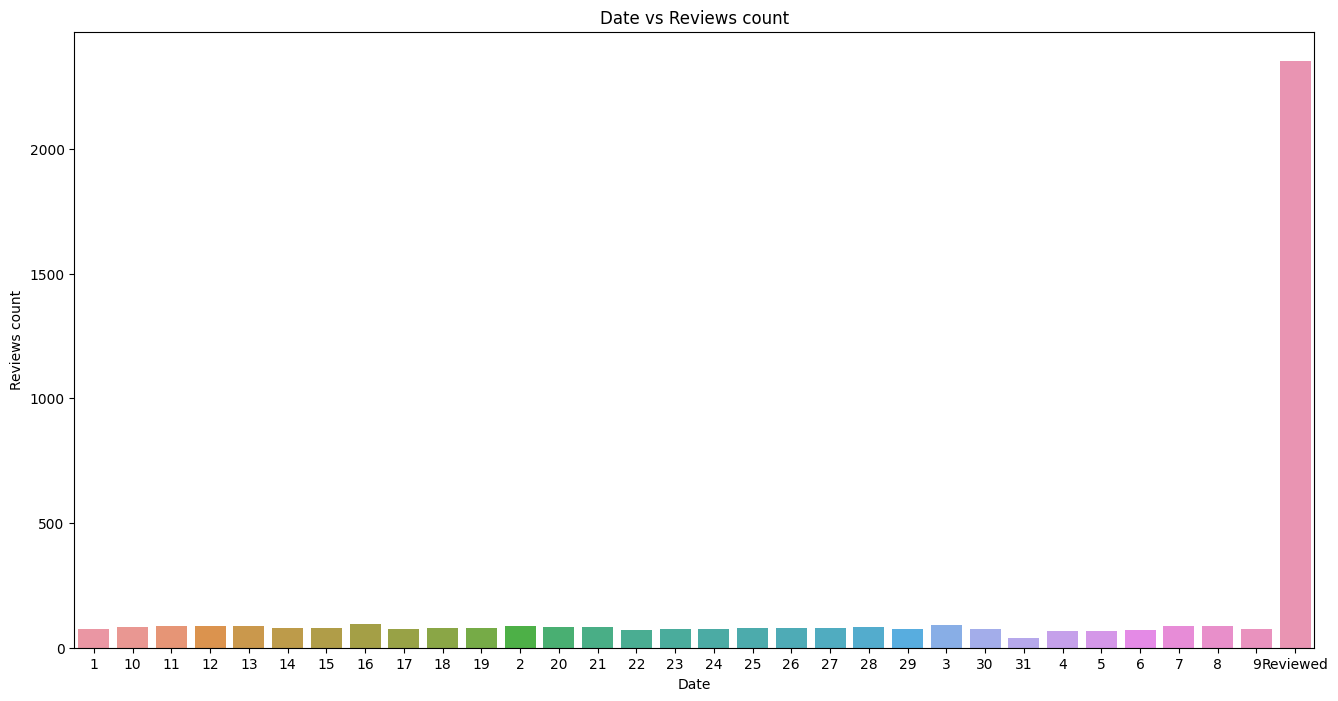

In [ ]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()

dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

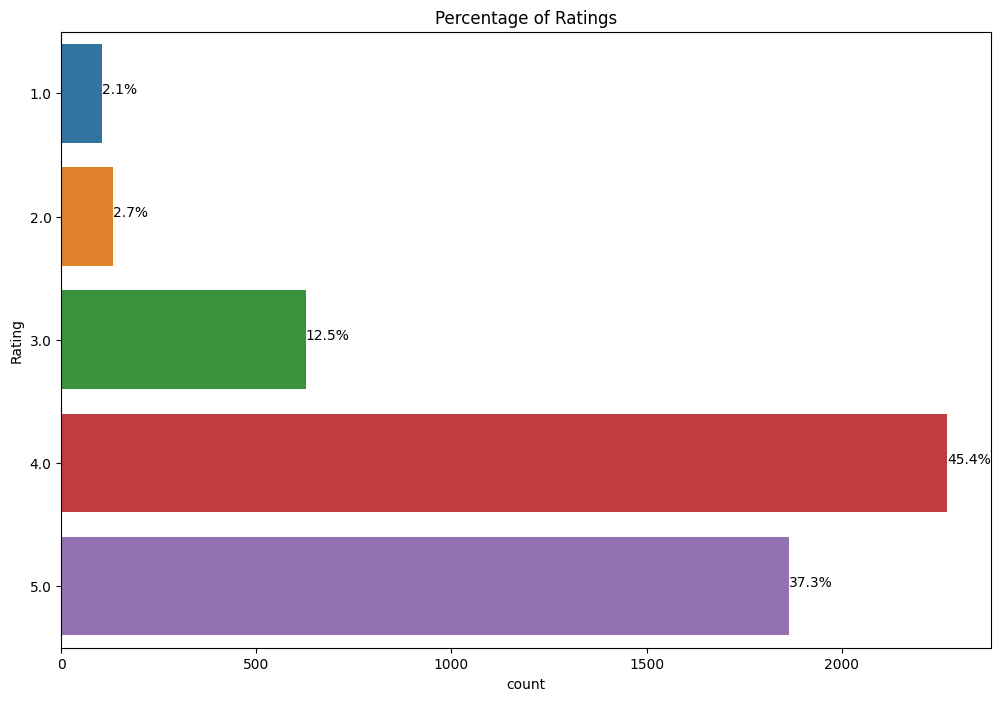

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

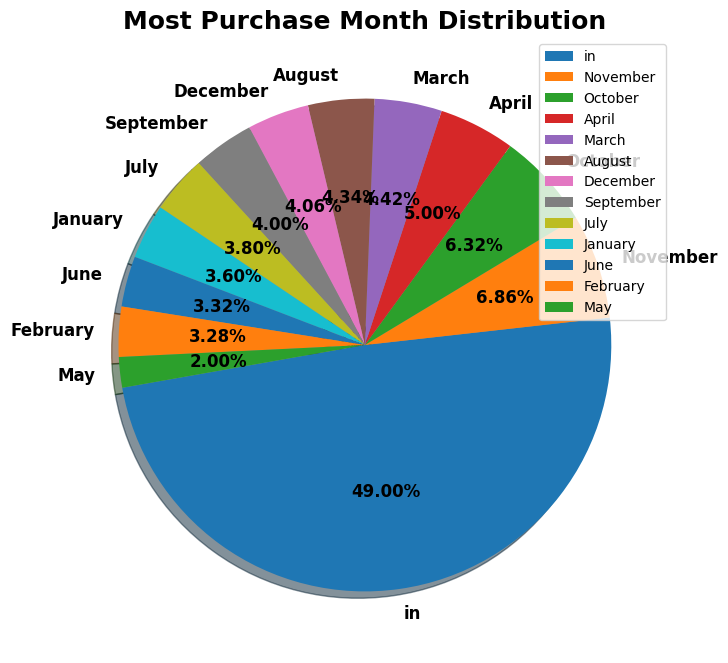

In [ ]:
plt.figure(figsize = (12,8))
plt.pie(df['Month'].value_counts(),
       labels=df['Month'].value_counts().index,
       
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Purchase Month Distribution", fontsize = 18, fontweight = 'bold')
plt.show()

In [ ]:
data = df[['Review']]
data

,Review
0,I've purchased the 6GB version of this phone w...
1,I will try to keep this review short. This rev...
2,Good looking and camera clarity is fabulous ba...
3,mobile signals not working mobile battery back...
4,"This phone is value for money. Meanwhile, you ..."
...,...
4995,Performance prospective this device has no iss...
4996,Very very good
4997,The media could not be loaded.
4998,Low brightness and camra issue front camra is ...


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [ ]:
data

,Review
0,i've purchased 6gb version phone comes extenda...
1,i try keep review short. this review perspecti...
2,good looking camera clarity fabulous battery l...
3,mobile signals working mobile battery backup g...
4,"this phone value money. meanwhile, can't exper..."
...,...
4995,performance prospective device issues comes ba...
4996,very good
4997,the media could loaded.
4998,low brightness camra issue front camra low tak...


In [ ]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,good looking camera clarity fabulous battery l...,Good looking and camera clarity is fabulous ba...
3,mobile signal working mobile battery backup go...,mobile signals not working mobile battery back...
4,phone value money meanwhile experience one plu...,"This phone is value for money. Meanwhile, you ..."


In [ ]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [ ]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,good looking camera clarity fabulous battery l...,Good looking and camera clarity is fabulous ba...
3,mobile signal working mobile battery backup go...,mobile signals not working mobile battery back...
4,phone value money meanwhile experience one plu...,"This phone is value for money. Meanwhile, you ..."
5,loved colour sky blue looked exceptional opene...,"I loved the colour (sky blue), which looked ex..."
6,great smartphone k camera battery processor go...,"It's a great smartphone under 20k. Camera, bat..."
7,posting review day used pro battery good using...,"I am posting a review after 7 days of used,Pro..."
8,worst experience product working properly auto...,"Worst Experience, Product is not working prope..."
9,camera sound screen processing battery,Out of 3Camera ++Sound ++Screen++Processing+++...


In [ ]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,good looking camera clarity fabulous battery l...,Good looking and camera clarity is fabulous ba...
3,mobile signal working mobile battery backup go...,mobile signals not working mobile battery back...
4,phone value money meanwhile experience one plu...,"This phone is value for money. Meanwhile, you ..."
5,loved colour sky blue looked exceptional opene...,"I loved the colour (sky blue), which looked ex..."
6,great smartphone k camera battery processor go...,"It's a great smartphone under 20k. Camera, bat..."
7,posting review day used pro battery good using...,"I am posting a review after 7 days of used,Pro..."
8,worst experience product working properly auto...,"Worst Experience, Product is not working prope..."
9,camera sound screen processing battery,Out of 3Camera ++Sound ++Screen++Processing+++...


In [ ]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,good looking camera clarity fabulous battery l...,Good looking and camera clarity is fabulous ba...
3,mobile signal working mobile battery backup go...,mobile signals not working mobile battery back...
4,phone value money meanwhile experience one plu...,"This phone is value for money. Meanwhile, you ..."
5,loved colour sky blue looked exceptional opene...,"I loved the colour (sky blue), which looked ex..."
6,great smartphone k camera battery processor go...,"It's a great smartphone under 20k. Camera, bat..."
7,posting review day used pro battery good using...,"I am posting a review after 7 days of used,Pro..."
8,worst experience product working properly auto...,"Worst Experience, Product is not working prope..."
9,camera sound screen processing battery,Out of 3Camera ++Sound ++Screen++Processing+++...


In [ ]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,good looking camera clarity fabulous battery l...,Good looking and camera clarity is fabulous ba...
3,mobile signal working mobile battery backup go...,mobile signals not working mobile battery back...
4,phone value money meanwhile experience one plu...,"This phone is value for money. Meanwhile, you ..."
5,loved colour sky blue looked exceptional opene...,"I loved the colour (sky blue), which looked ex..."
6,great smartphone k camera battery processor go...,"It's a great smartphone under 20k. Camera, bat..."
7,posting review day used pro battery good using...,"I am posting a review after 7 days of used,Pro..."
8,worst experience product working properly auto...,"Worst Experience, Product is not working prope..."
9,camera sound screen processing battery,Out of 3Camera ++Sound ++Screen++Processing+++...


In [ ]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,good looking camera clarity fabulous battery l...,Good looking and camera clarity is fabulous ba...
3,mobile signal working mobile battery backup go...,mobile signals not working mobile battery back...
4,phone value money meanwhile experience one plu...,"This phone is value for money. Meanwhile, you ..."
5,loved colour sky blue looked exceptional opene...,"I loved the colour (sky blue), which looked ex..."
6,great smartphone k camera battery processor go...,"It's a great smartphone under 20k. Camera, bat..."
7,posting review day used pro battery good using...,"I am posting a review after 7 days of used,Pro..."
8,worst experience product working properly auto...,"Worst Experience, Product is not working prope..."
9,camera sound screen processing battery,Out of 3Camera ++Sound ++Screen++Processing+++...


In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,good looking camera clarity fabulous battery l...,Good looking and camera clarity is fabulous ba...
3,mobile signal working mobile battery backup go...,mobile signals not working mobile battery back...
4,phone value money meanwhile experience one plu...,"This phone is value for money. Meanwhile, you ..."
5,loved colour sky blue looked exceptional opene...,"I loved the colour (sky blue), which looked ex..."
6,great smartphone k camera battery processor go...,"It's a great smartphone under 20k. Camera, bat..."
7,posting review day used pro battery good using...,"I am posting a review after 7 days of used,Pro..."
8,worst experience product working properly auto...,"Worst Experience, Product is not working prope..."
9,camera sound screen processing battery,Out of 3Camera ++Sound ++Screen++Processing+++...


In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,good looking camera clarity fabulous battery l...,Good looking and camera clarity is fabulous ba...
3,mobile signal working mobile battery backup go...,mobile signals not working mobile battery back...
4,phone value money meanwhile experience one plu...,"This phone is value for money. Meanwhile, you ..."
5,loved colour sky blue looked exceptional opene...,"I loved the colour (sky blue), which looked ex..."
6,great smartphone k camera battery processor go...,"It's a great smartphone under 20k. Camera, bat..."
7,posting review day used pro battery good using...,"I am posting a review after 7 days of used,Pro..."
8,worst experience product working properly auto...,"Worst Experience, Product is not working prope..."
9,camera sound screen processing battery,Out of 3Camera ++Sound ++Screen++Processing+++...


In [ ]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...,"[purchased, gb, version, phone, come, extendab..."
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...,"[try, keep, review, short, review, perspective..."
2,good looking camera clarity fabulous battery l...,Good looking and camera clarity is fabulous ba...,"[good, looking, camera, clarity, fabulous, bat..."
3,mobile signal working mobile battery backup go...,mobile signals not working mobile battery back...,"[mobile, signal, working, mobile, battery, bac..."
4,phone value money meanwhile experience one plu...,"This phone is value for money. Meanwhile, you ...","[phone, value, money, meanwhile, experience, o..."
5,loved colour sky blue looked exceptional opene...,"I loved the colour (sky blue), which looked ex...","[loved, colour, sky, blue, looked, exceptional..."
6,great smartphone k camera battery processor go...,"It's a great smartphone under 20k. Camera, bat...","[great, smartphone, k, camera, battery, proces..."
7,posting review day used pro battery good using...,"I am posting a review after 7 days of used,Pro...","[posting, review, day, used, pro, battery, goo..."
8,worst experience product working properly auto...,"Worst Experience, Product is not working prope...","[worst, experience, product, working, properly..."
9,camera sound screen processing battery,Out of 3Camera ++Sound ++Screen++Processing+++...,"[camera, sound, screen, processing, battery]"


In [ ]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [ ]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['try', 'keep', 'review', 'short', 'review', 'perspective', 'average', 'user', 'believe', 'buy', 'phone', 'start', 'use', 'change', 'adjust', 'without', 'complaining', 'much', 'always', 'better', 'device', 'price', 'use', 'tool', 'nothing', 'much', 'pro', 'camera', 'pretty', 'good', 'con', 'software', 'sweet', 'little', 'feature', 'one', 'plus', 'make', 'sweet', 'negative', 'speed', 'power', 'run', 'apps', 'people', 'use', 'generally', 'without', 'issue', 'build', 'quality', 'good', 'well', 'given', 'going', 'use', 'sort', 'case', 'con', 'con', 'see', 'battery', 'need', 'charge', 'twice', 'day', 'browse', 'internet', 'use', 'camera', 'time', 'watch', 'youtube', 'instagram', 'facebook', 'medium', 'apps', 'like', 'hour', 'two', 'mid', 'brightness', 'maximum', 'achievable', 'screen', 'time', 'around', 'hour', 'given', 'high', 'speed', 'charger', 'battery', 'really', 'issue', 'tweaking', 'around', 'setting', 'delete', 'preinstalled', 'apps', 'stop', 'unnecessary', 'apps', 'backgro

In [ ]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [purchased, gb, version, phone, come, extendab...
1    [try, keep, review, short, review, perspective...
2    [good, looking, camera, clarity, fabulous, bat...
3    [mobile, signal, working, mobile, battery, bac...
4    [phone, value, money, meanwhile, experience, o...
5    [loved, colour, sky, blue, looked, exceptional...
6    [great, smartphone, k, camera, battery, proces...
7    [posting, review, day, used, pro, battery, goo...
8    [worst, experience, product, working, properly...
9         [camera, sound, screen, processing, battery]
Name: Clean_Reviews, dtype: object

In [ ]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [ ]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,purchas gb version phone come extend gb ram vi...
1,tri keep review short review perspect averag u...
2,good look camera clariti fabul batteri life ni...
3,mobil signal work mobil batteri backup good ti...
4,phone valu money meanwhil experi one plus char...
...,...
4946,perform prospect devic issu come batteri drain...
4947,good
4948,medium could load
4949,low bright camra issu front camra low taken co...


In [ ]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,stemmed
0,purchased gb version phone come extendable gb ...
1,try keep review short review perspective avera...
2,good looking camera clarity fabulous battery l...
3,mobile signal working mobile battery backup go...
4,phone value money meanwhile experience one plu...
...,...
4946,performance prospective device issue come batt...
4947,good
4948,medium could loaded
4949,low brightness camra issue front camra low tak...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [ ]:
#print(cv.vocabulary_)

In [ ]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4951 [00:00<?, ?it/s]

In [ ]:
corpus[3]

'mobil signal work mobil batteri backup good time hang time hang yesterday visit oneplu store good servic'

In [ ]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

(4951, 5000)

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame()
count_df

""


In [ ]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4951 [00:00<?, ?it/s]

In [ ]:
corpus[4]

'phone valu money meanwhil experi one plu charm camera qualiti averag g connect speed slightli le connect speed g phone'

In [ ]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [ ]:
X.shape

(4951, 5000)

In [ ]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'purchased gb version phone come extendable gb ram virtual memory capability good phone least expensive category offering one plus small evident point get noticed first thing confusing placement power button hence finger sensor daily handling mobile phone feel bit annoying finger locking un locking phone try handle place pocket although big problem still something think second point lag noticeable bit hoping might go away update improvement third point speaker volume speaker good near maximum level e volume seem creep steadily rather louds top volume limit fourth point final one camera shoot color realistic photo taken day light especially skin tone tend coloured led flash average could better good awesome part phone practicality daily user one plus strong brand part pricing offered battery life good charging capability also impressive someone like moved android phone build phone apt survive normal fall mishap happening phone feel solid hand stock android clean nothing complain overall

In [ ]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[:50]:
    print(token,token.pos_) 

purchased VERB
gb PROPN
version NOUN
phone NOUN
come VERB
extendable ADJ
gb NOUN
ram VERB
virtual ADJ
memory NOUN
capability NOUN
good ADJ
phone NOUN
least ADJ
expensive ADJ
category NOUN
offering VERB
one NUM
plus CCONJ
small ADJ
evident ADJ
point NOUN
get AUX
noticed VERB
first ADJ
thing NOUN
confusing VERB
placement NOUN
power NOUN
button NOUN
hence ADV
finger PROPN
sensor NOUN
daily ADV
handling VERB
mobile ADJ
phone NOUN
feel NOUN
bit NOUN
annoying ADJ
finger NOUN
locking VERB
un PROPN
locking VERB
phone NOUN
try NOUN
handle VERB
place NOUN
pocket NOUN
although SCONJ


In [ ]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['keep', 'review', 'review', 'perspective', 'user', 'believe', 'buy', 'phone', 'start', 'use', 'change', 'adjust', 'complaining', 'device', 'price', 'use', 'tool', 'camera', 'con', 'software', 'feature', 'make', 'speed', 'power', 'run', 'apps', 'people', 'use', 'issue', 'build', 'quality', 'given', 'going', 'use', 'sort', 'case', 'see', 'battery', 'need', 'charge', 'day', 'browse', 'internet', 'use', 'camera', 'time', 'watch', 'facebook', 'medium', 'apps', 'hour', 'brightness', 'screen', 'time', 'hour', 'given', 'speed', 'charger', 'battery', 'issue', 'tweaking', 'setting', 'delete', 'preinstalled', 'apps', 'stop', 'apps', 'background', 'achieve', 'hr', 'screen', 'time', 'peace', 'looking', 'camera', 'clarity', 'battery', 'life', 'charging', 'fingure', 'scanner', 'working', 'software', 'hanging', 'issue', 'signal', 'working', 'battery', 'backup', 'time', 'hanged', 'time', 'hanged', 'yesterday', 'visited', 'oneplus', 'store', 'service', 'phone', 'value']


In [ ]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,2317
1,camera,1519
2,battery,1010
3,quality,918
4,price,511
5,product,507
6,day,352
7,performance,331
8,life,324
9,issue,312


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

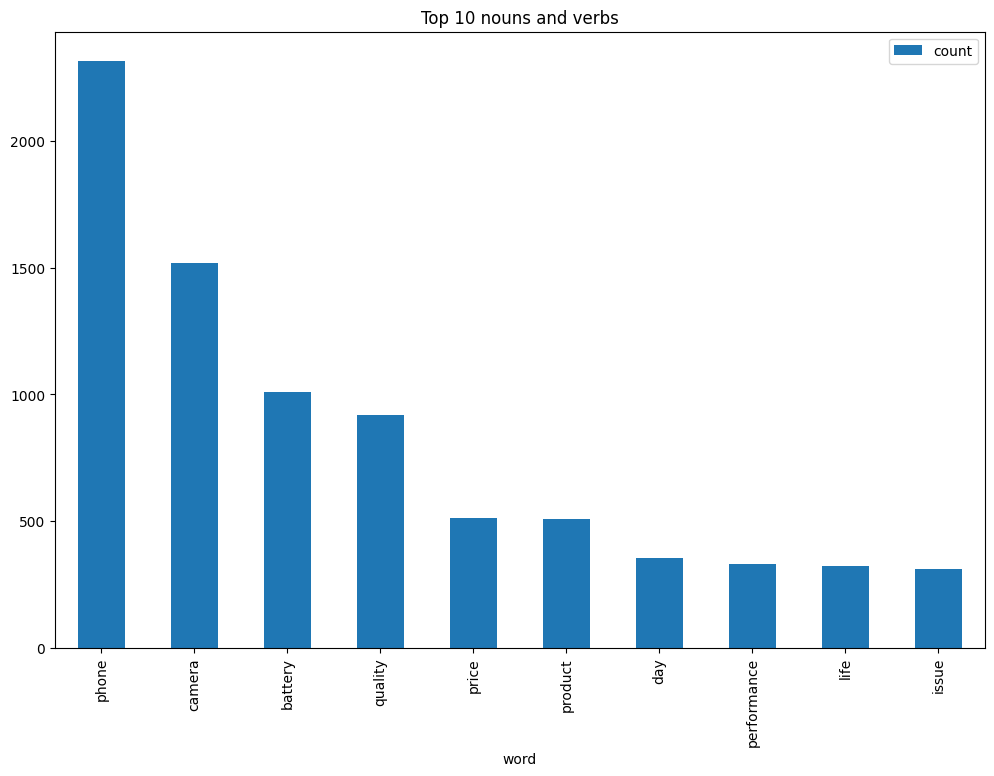

In [ ]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [ ]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [ ]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [ ]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,4540
neg,411


In [ ]:
dataframe.Clean_Reviews[8]

'worst experience product working properly auto restart showing screen'

In [ ]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,purchased gb version phone come extendable gb ...,"{'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co..."
1,try keep review short review perspective avera...,"{'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co..."
2,good looking camera clarity fabulous battery l...,"{'neg': 0.0, 'neu': 0.431, 'pos': 0.569, 'comp..."
3,mobile signal working mobile battery backup go...,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp..."
4,phone value money meanwhile experience one plu...,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp..."


In [ ]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,purchased gb version phone come extendable gb ...,"{'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...",0.9876
1,try keep review short review perspective avera...,"{'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...",0.9776
2,good looking camera clarity fabulous battery l...,"{'neg': 0.0, 'neu': 0.431, 'pos': 0.569, 'comp...",0.9552
3,mobile signal working mobile battery backup go...,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...",0.7003
4,phone value money meanwhile experience one plu...,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...",0.6249


In [ ]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,purchased gb version phone come extendable gb ...,"{'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...",0.9876,Positive
1,try keep review short review perspective avera...,"{'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...",0.9776,Positive
2,good looking camera clarity fabulous battery l...,"{'neg': 0.0, 'neu': 0.431, 'pos': 0.569, 'comp...",0.9552,Positive
3,mobile signal working mobile battery backup go...,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...",0.7003,Positive
4,phone value money meanwhile experience one plu...,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...",0.6249,Positive
...,...,...,...,...
4946,performance prospective device issue come batt...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4947,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive
4948,medium could loaded,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4949,low brightness camra issue front camra low tak...,"{'neg': 0.271, 'neu': 0.627, 'pos': 0.102, 'co...",-0.5106,Negative


In [ ]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.9/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<Axes: xlabel='sentiment', ylabel='count'>

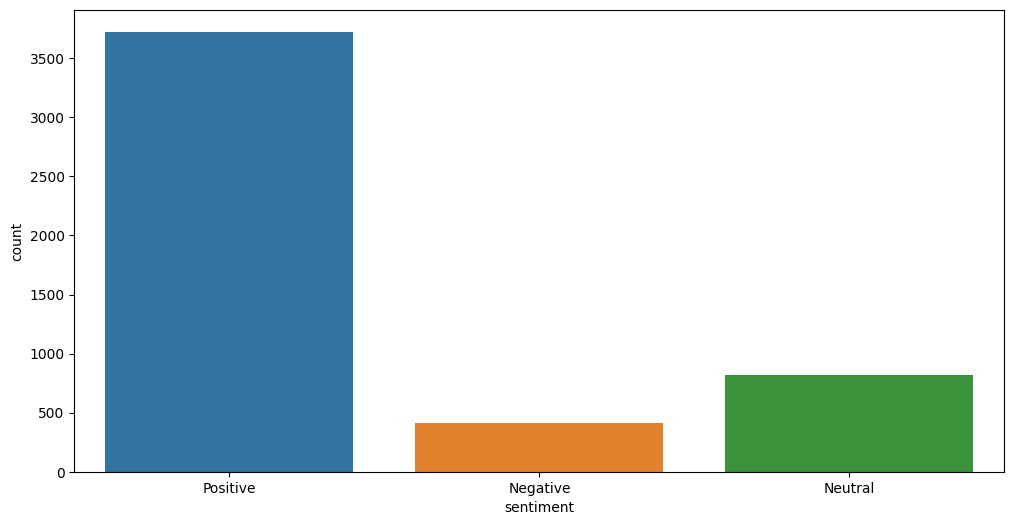

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

<ipython-input-114-b3e96d257d7c>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='compound', ylabel='Density'>

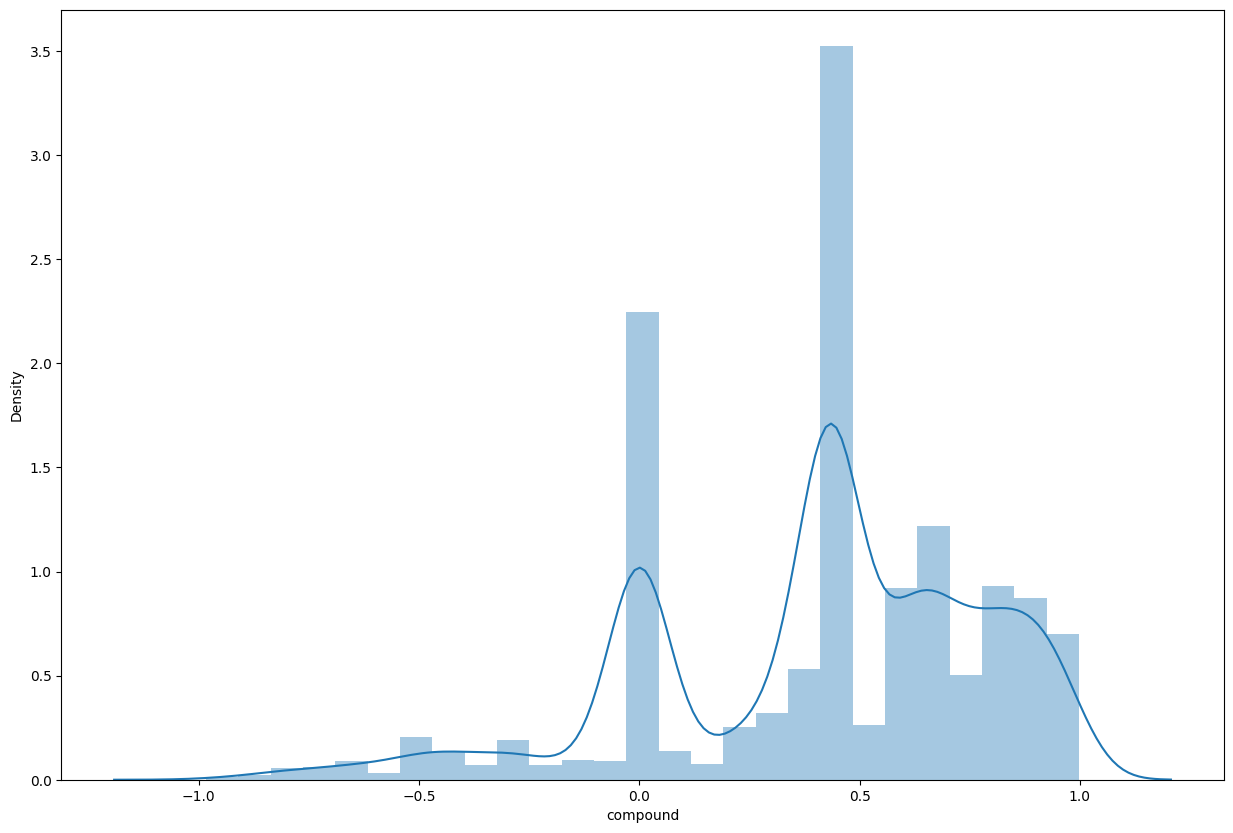

In [ ]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [ ]:
df['word_count'] = df.apply(lambda x: len(str(x).split(" ")))
df[['word_count']].head()

,word_count
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='compound'>

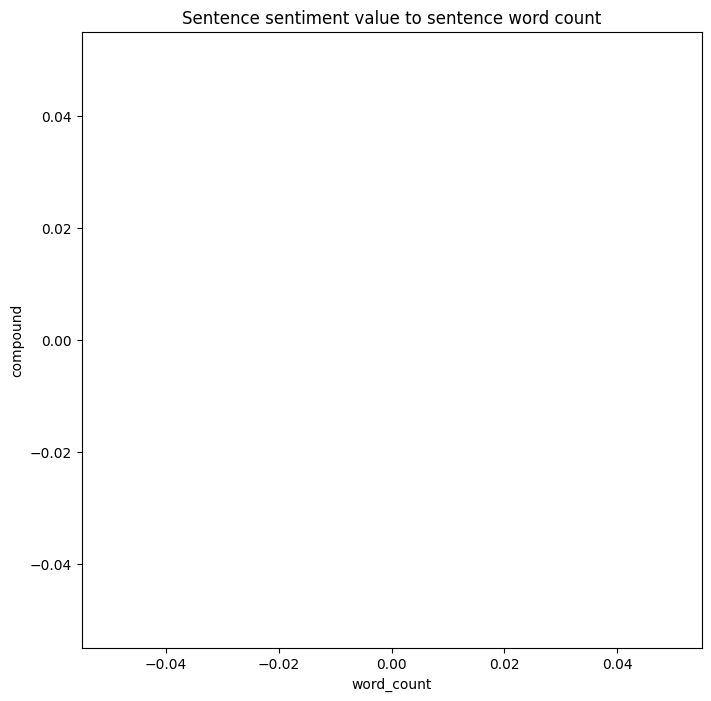

In [ ]:
# Correlation analysis
df.plot.scatter(x='word_count',y='compound',figsize=(8,8),title='Sentence sentiment value to sentence word count')

In [ ]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,4612
neg,339


In [ ]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()


,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...,0.486111,0.180556
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...,0.498519,0.169769
2,good looking camera clarity fabulous battery l...,Good looking and camera clarity is fabulous ba...,0.757143,0.485714
3,mobile signal working mobile battery backup go...,mobile signals not working mobile battery back...,0.600000,0.700000
4,phone value money meanwhile experience one plu...,"This phone is value for money. Meanwhile, you ...",0.283333,-0.158333


Text(0, 0.5, 'Subjectivity')

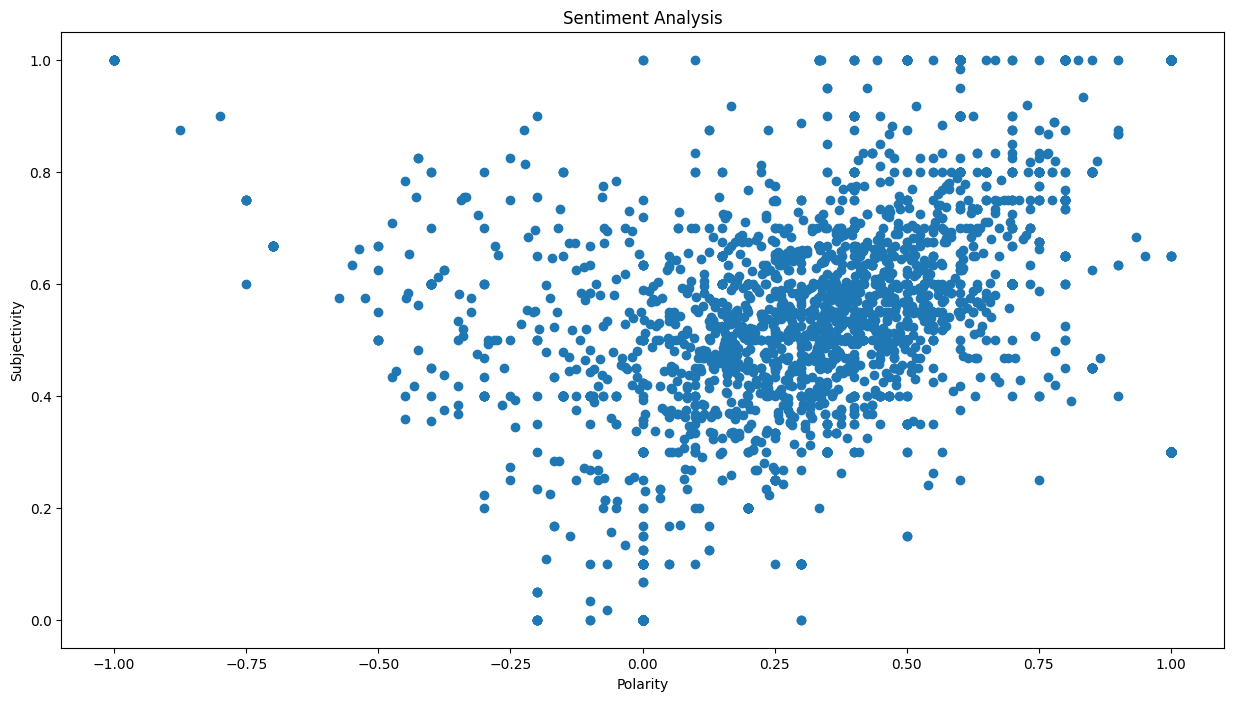

In [ ]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()


In [ ]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity,sentiment
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...,0.486111,0.180556,pos
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...,0.498519,0.169769,pos
2,good looking camera clarity fabulous battery l...,Good looking and camera clarity is fabulous ba...,0.757143,0.485714,pos
3,mobile signal working mobile battery backup go...,mobile signals not working mobile battery back...,0.600000,0.700000,pos
4,phone value money meanwhile experience one plu...,"This phone is value for money. Meanwhile, you ...",0.283333,-0.158333,pos


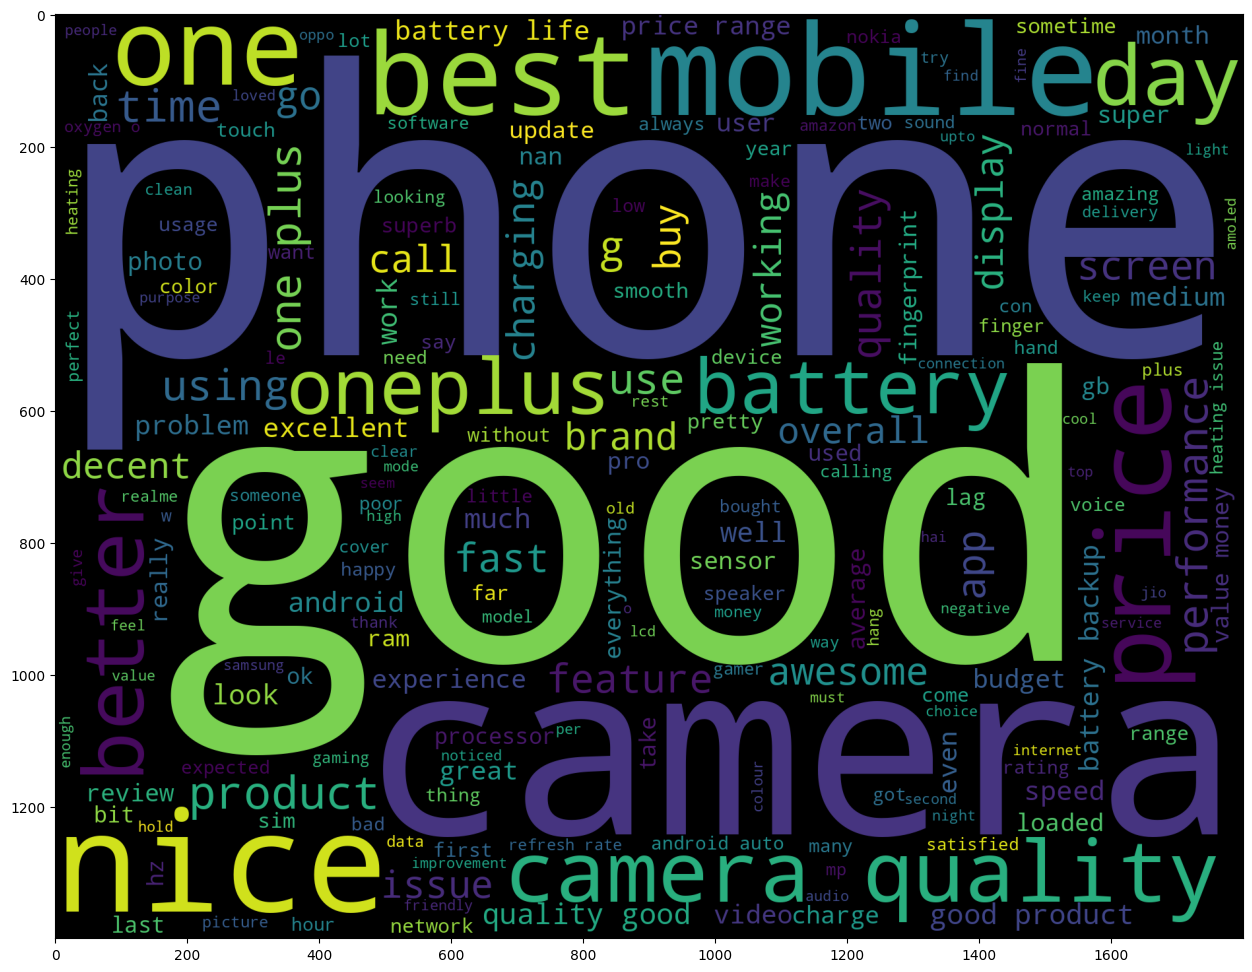

In [ ]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

In [ ]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

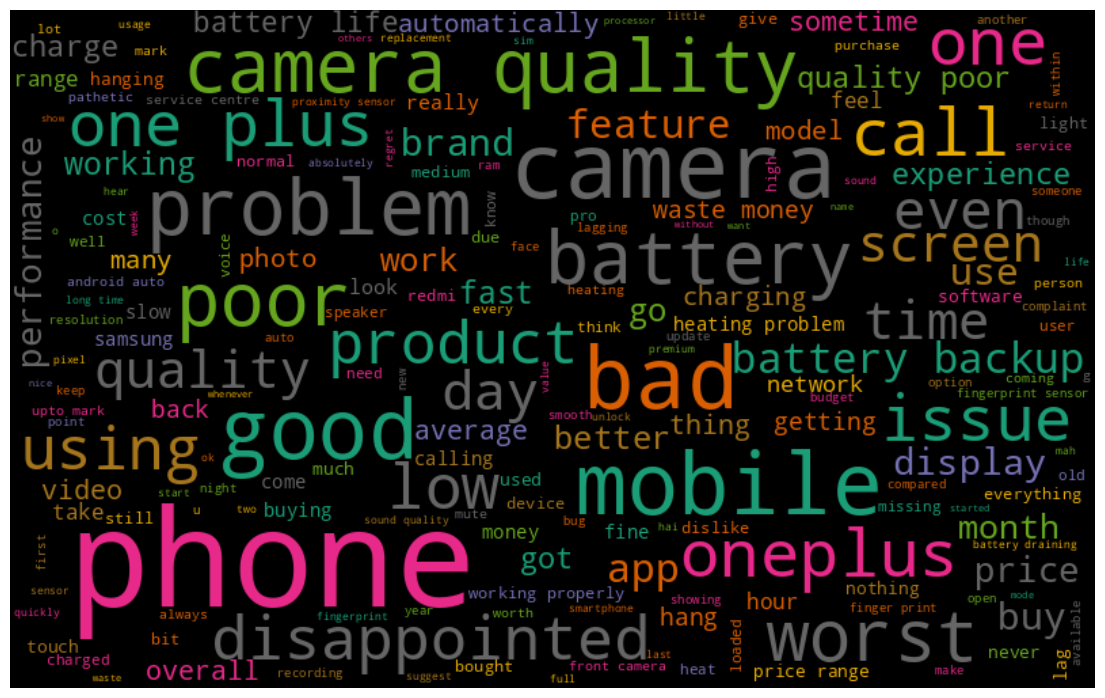

In [ ]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)